# Deep Network Models

Constructing and training your own ConvNet from scratch can be Hard and a long task.

A common trick used in Deep Learning is to use a **pre-trained** model and finetune it to the specific data it will be used for. 

## Famous Models with Keras


This notebook contains code and reference for the following Keras models (gathered from [https://github.com/fchollet/keras/tree/master/keras/applications]())

- VGG16
- VGG19
- ResNet50
- Inception v3
- Xception
- ... more to come


## References

- [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556) - please cite this paper if you use the VGG models in your work.
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - please cite this paper if you use the ResNet model in your work.
- [Rethinking the Inception Architecture for Computer Vision](http://arxiv.org/abs/1512.00567) - please cite this paper if you use the Inception v3 model in your work.


All architectures are compatible with both TensorFlow and Theano, and upon instantiation the models will be built according to the image dimension ordering set in your Keras configuration file at `~/.keras/keras.json`. 

For instance, if you have set `image_data_format="channels_last"`, then any model loaded from this repository will get built according to the TensorFlow dimension ordering convention, "Width-Height-Depth".

# VGG16

<img src="imgs/vgg16.png" >

# VGG19

<img src="imgs/vgg19.png" heigth="10%" />

# `keras.applications`

In [1]:
from keras.applications import VGG16
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import os

Using TensorFlow backend.


In [2]:
vgg16 = VGG16(include_top=True, weights='imagenet')
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

If you're wondering **where** this `HDF5` files with weights is stored, please take a look at `~/.keras/models/`

#### HandsOn VGG16 - Pre-trained Weights

In [3]:
IMAGENET_FOLDER = 'imgs/imagenet'  #in the repo

In [4]:
!ls imgs/imagenet

apricot_565.jpeg  apricot_787.jpeg	strawberry_1174.jpeg
apricot_696.jpeg  strawberry_1157.jpeg	strawberry_1189.jpeg


<img src="imgs/imagenet/strawberry_1157.jpeg" width="40%" />

In [5]:
from keras.preprocessing import image
import numpy as np

img_path = os.path.join(IMAGENET_FOLDER, 'strawberry_1157.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
24576/35363 [===================>..........] - ETA: 0sPredicted: [[('n07745940', 'strawberry', 0.98570204), ('n07836838', 'chocolate_sauce', 0.005128039), ('n04332243', 'strainer', 0.003665844), ('n07614500', 'ice_cream', 0.0021996102), ('n04476259', 'tray', 0.0011693746)]]


<img src="imgs/imagenet/apricot_696.jpeg" width="40%" />

In [6]:
img_path = os.path.join(IMAGENET_FOLDER, 'apricot_696.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07747607', 'orange', 0.84150302), ('n07749582', 'lemon', 0.053847123), ('n07717556', 'butternut_squash', 0.017796788), ('n03937543', 'pill_bottle', 0.015318954), ('n07720875', 'bell_pepper', 0.0083615109)]]


<img src="imgs/imagenet/apricot_565.jpeg" width="40%" />

In [7]:
img_path = os.path.join(IMAGENET_FOLDER, 'apricot_565.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07718472', 'cucumber', 0.37647021), ('n07716358', 'zucchini', 0.25893894), ('n07711569', 'mashed_potato', 0.049320064), ('n07716906', 'spaghetti_squash', 0.033613835), ('n12144580', 'corn', 0.031451166)]]


# Hands On:

### Try to do the same with VGG19 Model

In [8]:
# from keras.applications import VGG19

# - Visualise Summary
# - Infer classes using VGG19 predictions

In [9]:
# [your code here]

# Residual Networks

<img src="imgs/resnet_bb.png" >

## ResNet 50

<img src="imgs/resnet34.png" >

In [10]:
from keras.applications import ResNet50

A ResNet is composed by two main blocks: **Identity Block** and the **ConvBlock**.

* IdentityBlock is the block that has no conv layer at shortcut
* ConvBlock is the block that has a conv layer at shortcut

In [11]:
from keras.applications.resnet50 import identity_block, conv_block

In [12]:
identity_block??

In [13]:
conv_block??

---

# Visualising Convolutional Filters of a CNN

In [14]:
import numpy as np
import time
from keras.applications import vgg16
from keras import backend as K

In [15]:
from matplotlib import pyplot as plt

%matplotlib inline

In [16]:
# dimensions of the generated pictures for each filter.
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [17]:
from keras.applications import vgg16

# build the VGG16 network with ImageNet weights
vgg16 = vgg16.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

56664064/58889256 [===========================>..] - ETA: 0sModel loaded.


In [18]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [19]:
from collections import OrderedDict
layer_dict = OrderedDict()
# get the symbolic outputs of each "key" layer (we gave them unique names).
for layer in vgg16.layers[1:]:
    layer_dict[layer.name] = layer

#### Test Image

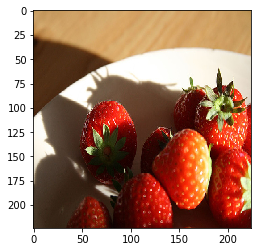

In [20]:
img_path = os.path.join(IMAGENET_FOLDER, 'strawberry_1157.jpeg')
img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
plt.imshow(img)

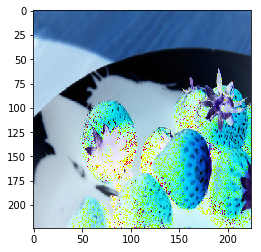

In [21]:
input_img_data = image.img_to_array(img)
# input_img_data /= 255
plt.imshow(input_img_data)

In [22]:
input_img_data = np.expand_dims(input_img_data, axis=0)
print('Input image shape:', input_img_data.shape)

Input image shape: (1, 224, 224, 3)


### Visualising Image throught the layers

In [23]:
## Recall the function defined in notebook on hidden features (2.1 Hidden Layer Repr. and Embeddings)

def get_activations(model, layer, input_img_data):
    activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activations_f((input_img_data, False))
    return activations

In [24]:
layer_name = 'block1_conv2'
layer = layer_dict[layer_name]
activations = get_activations(vgg16, layer, input_img_data)

In [25]:
print(len(activations))
activation = activations[0]
activation.shape

1


(1, 224, 224, 64)

In [26]:
layer.filters  # no. of filters in the selected conv block

64

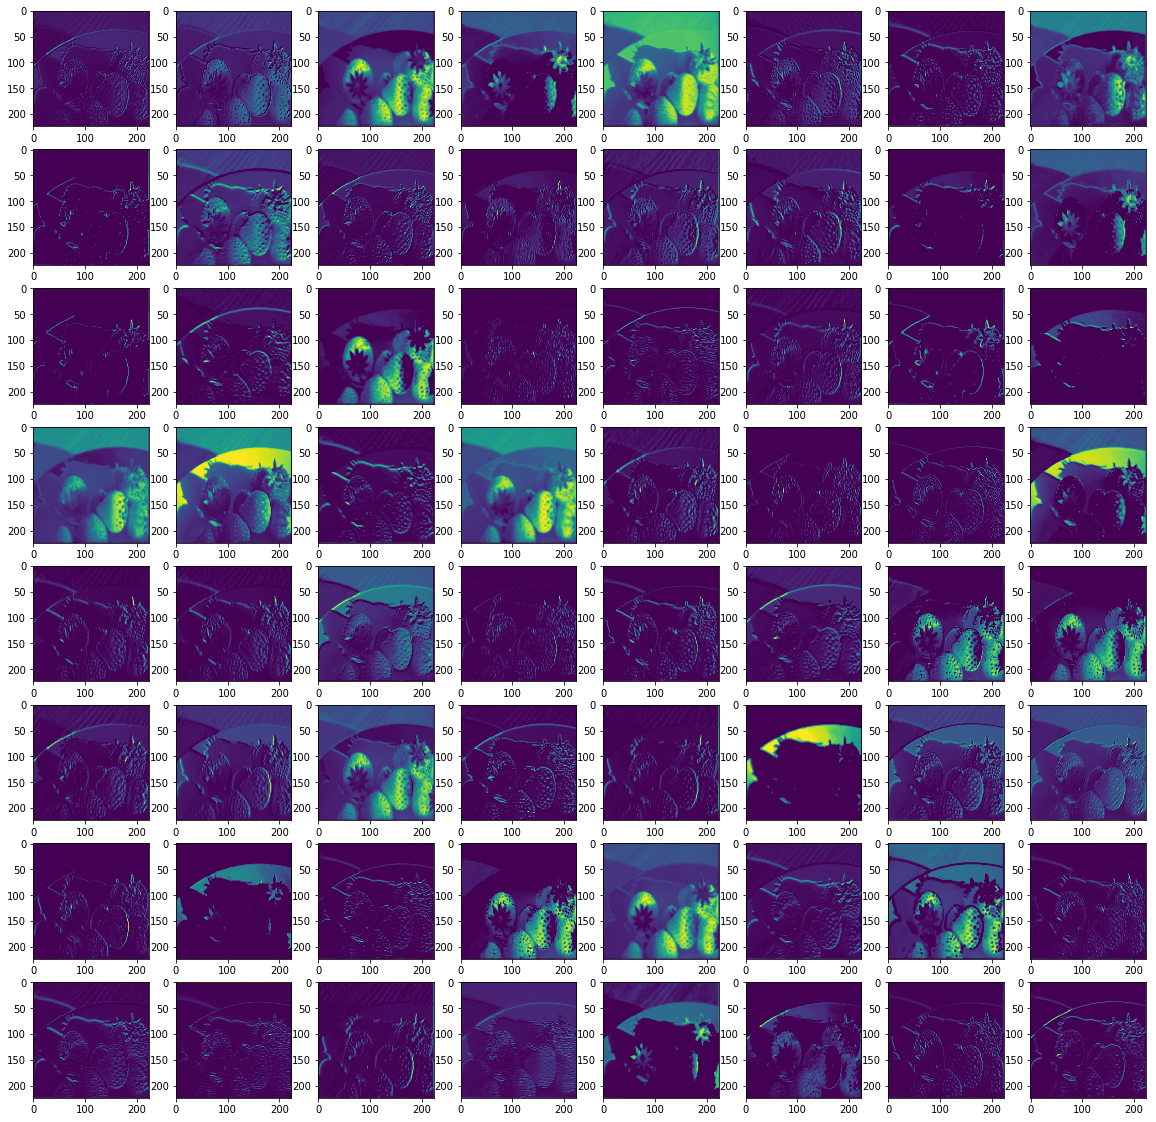

In [27]:
activated_img = activation[0]
n = 8
fig = plt.figure(figsize=(20, 20))
for i in range(n):
    for j in range(n):
        idx = (n*i)+j
        ax = fig.add_subplot(n, n, idx+1)
        ax.imshow(activated_img[:,:,idx])

In [28]:
conv_img_mean = np.mean(activated_img, axis=2)

In [29]:
conv_img_mean.shape

(224, 224)

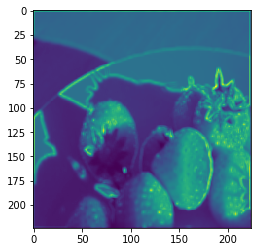

In [30]:
plt.imshow(conv_img_mean)

#### Now visualise the first 64 filters of the `block5_conv2` layer

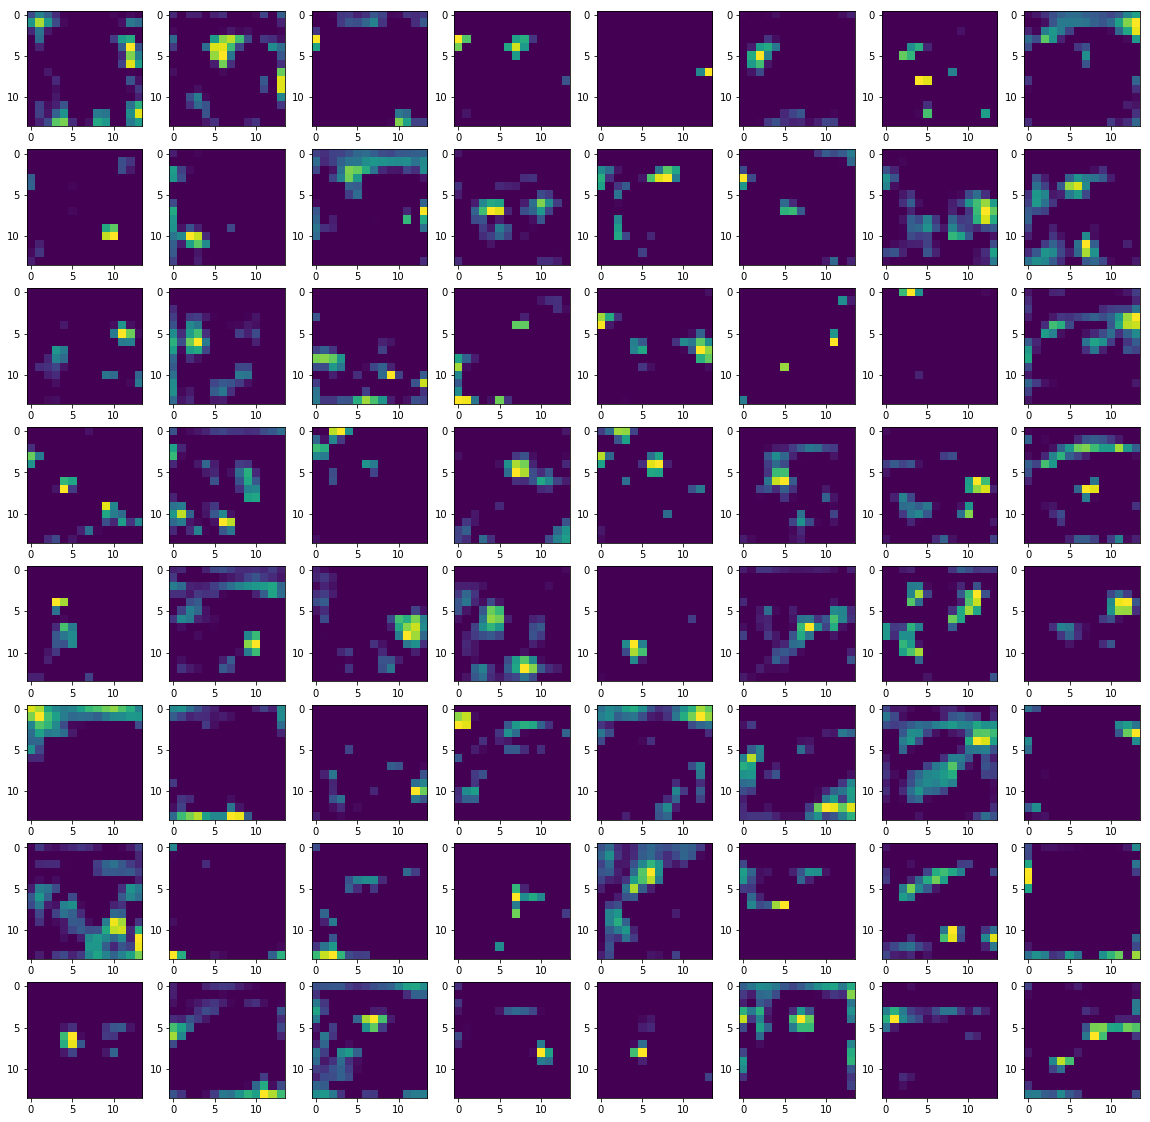

In [31]:
layer_name = 'block5_conv2'
layer = layer_dict[layer_name]
activations = get_activations(vgg16, layer, input_img_data)
activated_img = activations[0][0]  # [0][0] -> first (and only) activation, first (and only) sample in batch
n = 8
fig = plt.figure(figsize=(20, 20))
for i in range(n):
    for j in range(n):
        idx = (n*i)+j
        ax = fig.add_subplot(n, n, idx+1)
        ax.imshow(activated_img[:,:,idx])

## How Convnet see the world

Reference: [https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html)

#### Specify Percentage of Filters to scan

In this example, we'll still using VGG16 as the reference model. 

Of course, the same code applies to different CNN models, with appriopriate changes in layers references/names.

---

Please note that VGG16 includes a variable number of convolutional filters, depending on
the particular layer(s) selected for processing.

Processing all the convolutional filters may be a high intensive computation and time consuming and largely depending on the number of parameters for the layer.

On my hardwarde (1 Tesla K80 GPU on Azure Cloud) processing one single filter takes almost ~.5 secs. (on avg)

So, it would take ~256 secs (e.g. for `block5_conv1`) $\mapsto$ ~4mins (for one single layer name)

In [32]:
# utility function to convert a tensor into a valid image

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [33]:
# dimensions of the generated pictures for each filter.
img_width = 224
img_height = 224

def collect_filters(input_tensor, output_tensor, filters):
    kept_filters = []
    start_time = time.time()
    for filter_index in range(0, filters):
        if filter_index % 10 == 0:
            print('\t Processing filter {}'.format(filter_index))

        # we build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        if K.image_data_format() == 'channels_first':
            loss = K.mean(output_tensor[:, filter_index, :, :])
        else:
            loss = K.mean(output_tensor[:, :, :, filter_index])

        # we compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, input_tensor)[0]
        # normalization trick: we normalize the gradient by its L2 norm
        grads = grads / (K.sqrt(K.mean(K.square(grads))) + 1e-5)
        # this function returns the loss and grads given the input picture
        iterate = K.function([input_tensor], [loss, grads])

        # step size for gradient ascent
        step = 1.
        
        # we start from a gray image with some random noise
        if K.image_data_format() == 'channels_first':
            img_data = np.random.random((1, 3, img_width, img_height))
        else:
            img_data = np.random.random((1, img_width, img_height, 3))
        
        img_data = (img_data - 0.5) * 20 + 128

        # we run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_data])
            img_data += grads_value * step
            if loss_value <= 0.:
                # some filters get stuck to 0, we can skip them
                break

        # decode the resulting input image
        if loss_value > 0:
            img_deproc = deprocess_image(img_data[0])
            kept_filters.append((img_deproc, loss_value))
            
    end_time = time.time()
    print('\t Time required to process {} filters: {}'.format(filters, (end_time - start_time)))
            
    return kept_filters

In [34]:
# this is the placeholder for the input images
input_t = vgg16.input

def generate_stiched_filters(layer, nb_filters):
    layer_name = layer.name
    print('Processing {} Layer'.format(layer_name))
    
    # Processing filters of current layer
    layer_output = layer.output
    kept_filters = collect_filters(input_t, layer_output, nb_filters)
    
    print('Filter collection: completed!')
    # we will stich the best sqrt(filters_to_scan) filters put on a n x n grid.
    limit = min(nb_filters, len(kept_filters))
    n = np.floor(np.sqrt(limit)).astype(np.int)

    # the filters that have the highest loss are assumed to be better-looking.
    # we will only keep the top 64 filters.
    kept_filters.sort(key=lambda x: x[1], reverse=True)
    kept_filters = kept_filters[:n * n]
    
    # build a black picture with enough space for
    margin = 5
    width = n * img_width + (n - 1) * margin
    height = n * img_height + (n - 1) * margin
    stitched_filters = np.zeros((width, height, 3))

    # fill the picture with our saved filters
    for i in range(n):
        for j in range(n):
            img, loss = kept_filters[i * n + j]
            stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                             (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img
    return stitched_filters

Processing block1_conv2 Layer
	 Processing filter 0
	 Processing filter 10
	 Processing filter 20
	 Processing filter 30
	 Processing filter 40
	 Processing filter 50
	 Processing filter 60
	 Time required to process 64 filters: 19.155842065811157
Filter collection: completed!


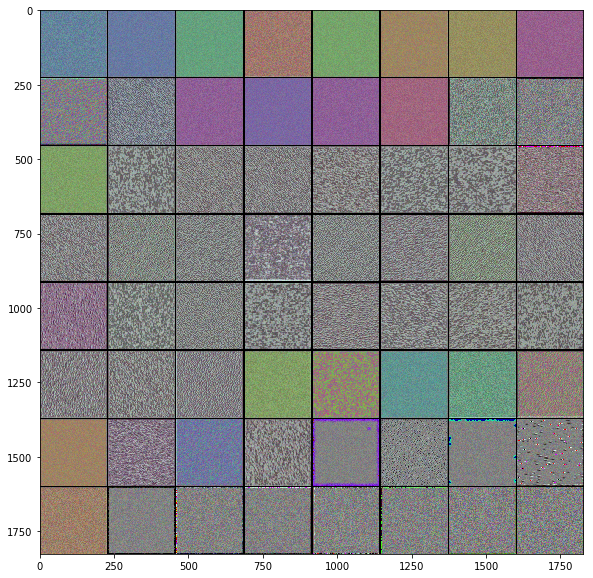

In [35]:
layer = layer_dict['block1_conv2']  # 64 filters
stitched_filters = generate_stiched_filters(layer, layer.filters)
plt.figure(figsize=(10,10))
plt.imshow(stitched_filters)

Processing block5_conv1 Layer
	 Processing filter 0
	 Processing filter 10
	 Processing filter 20
	 Processing filter 30
	 Processing filter 40
	 Processing filter 50
	 Processing filter 60
	 Time required to process 64 filters: 71.79986333847046
Filter collection: completed!


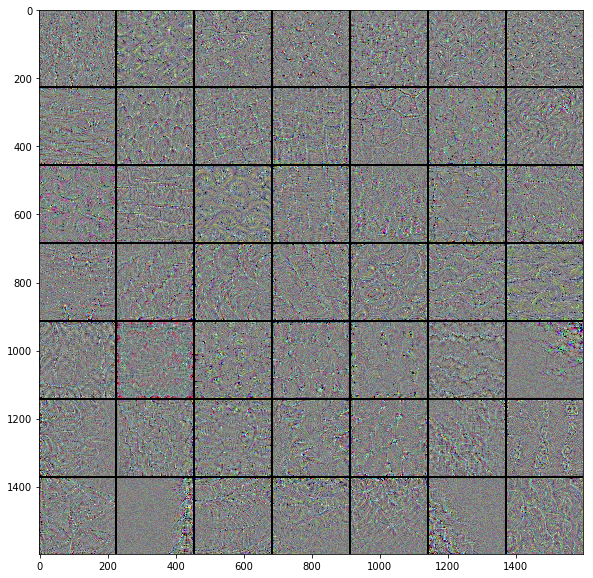

In [36]:
layer = layer_dict['block5_conv1']  # 512 filters in total
stitched_filters = generate_stiched_filters(layer, 64)
plt.figure(figsize=(10,10))
plt.imshow(stitched_filters)

---